### Load Dataset and Convert to DataFrame

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes

# Load diabetes dataset
diabetes = load_diabetes()

# Convert to DataFrame for exploration
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

# Overview
print("Shape of dataset:", df.shape)
print("\nColumns:", df.columns.tolist())
df.head()


Shape of dataset: (442, 11)

Columns: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target']


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


### Data Summary and Info

In [2]:
# Summary statistics
display(df.describe())

# Dataset info
df.info()

# Check for missing values
missing = df.isnull().sum()
print("\nMissing Values in Dataset:\n", missing)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB

Missing Values in Dataset:
 age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


The dataset contains 442 observations and 10 normalized input features, with a continuous target variable (`target`) representing disease progression. There are no missing values, so no imputation is necessary at this stage.

### Feature Distributions

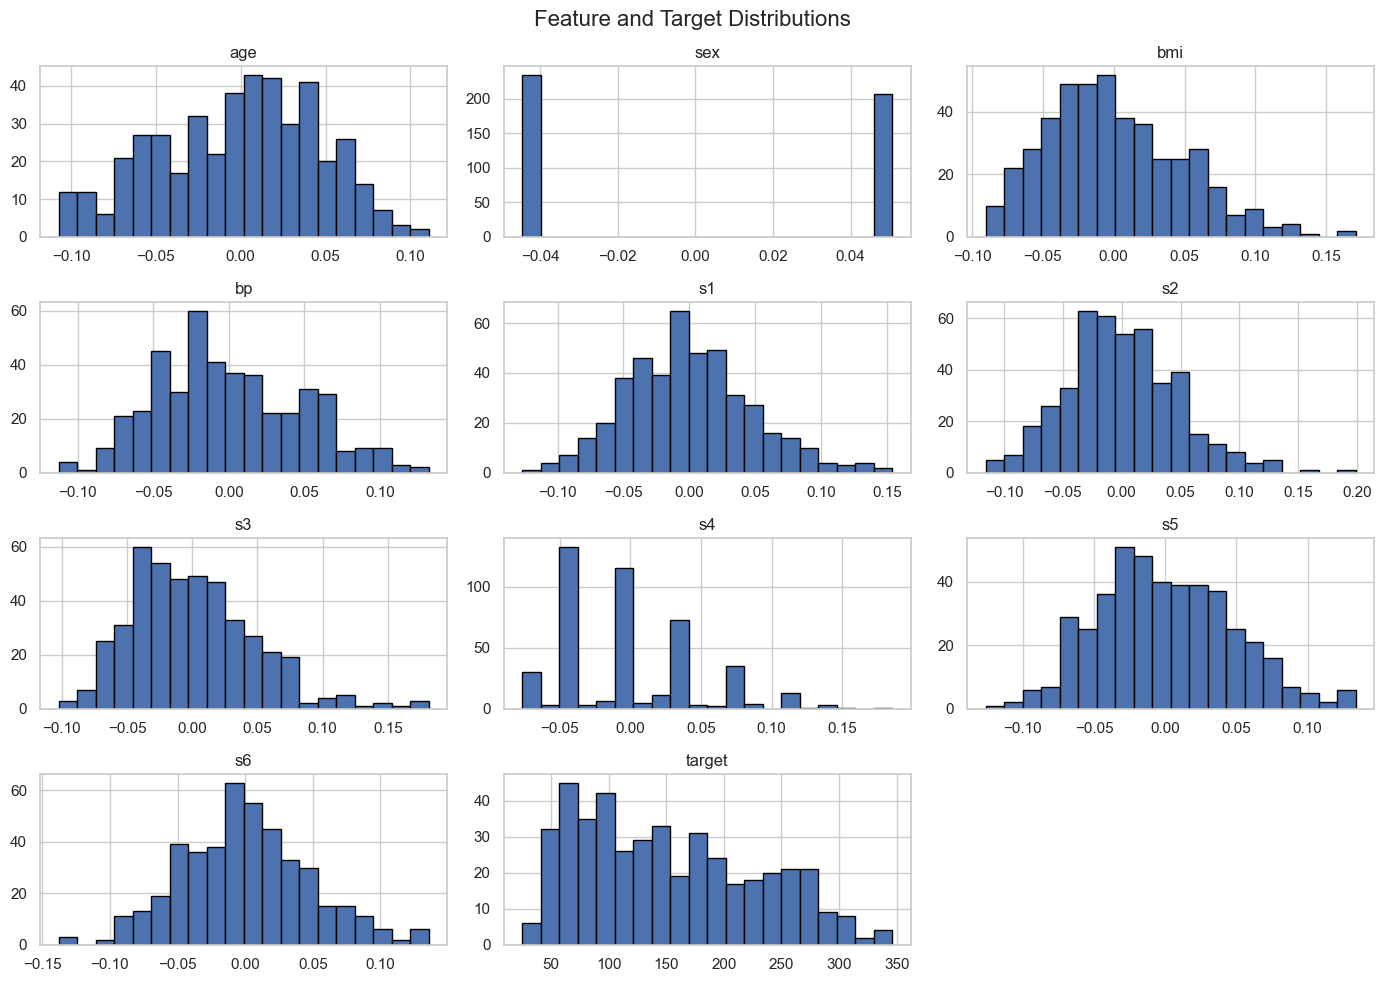

In [3]:
# Set Seaborn style
sns.set(style="whitegrid")

# Plot distributions of all features
df.hist(bins=20, figsize=(14, 10), edgecolor='black')
plt.suptitle("Feature and Target Distributions", fontsize=16)
plt.tight_layout()
plt.show()


### Correlation Matrix with Heatmap

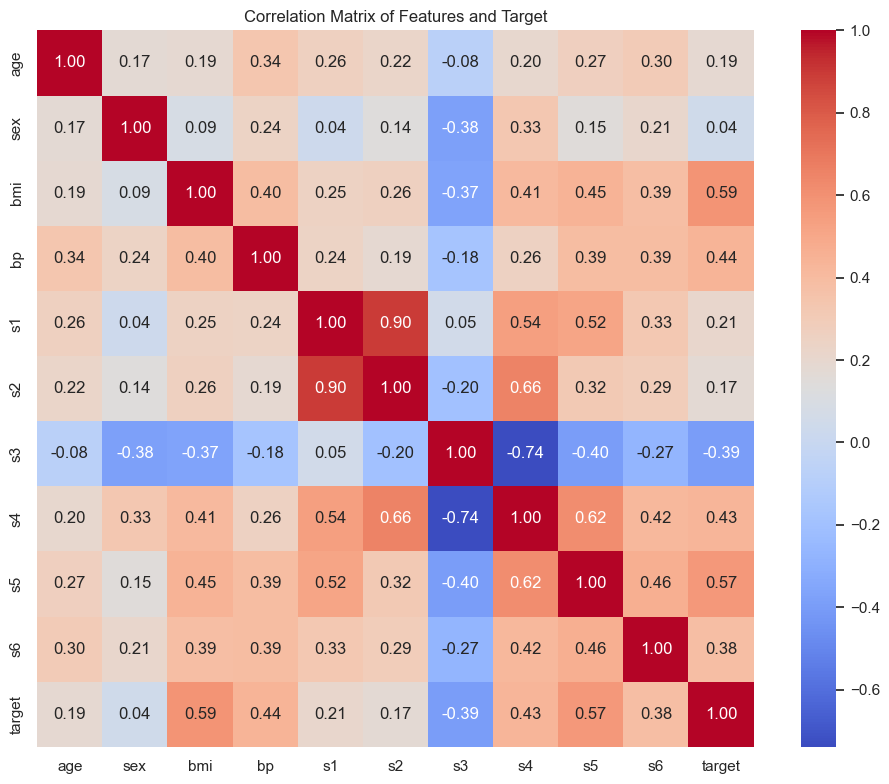

In [4]:
# Correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix of Features and Target")
plt.tight_layout()
plt.show()


From the correlation matrix, we observe that features like `bmi` and `s5` have stronger positive correlations with the target variable. This insight will help guide feature selection and interpretation in later regression models.

## Data Preparation and Exploration

In this step, we loaded the **Diabetes dataset** from `sklearn.datasets` and converted it into a structured `pandas` DataFrame for ease of exploration.

- ✅ **No missing values** were found, confirming that the dataset is clean and ready for modeling.
- 📊 **Histograms** revealed the distribution of each feature and the target, showing mostly normalized values (as expected).
- 🔍 The **correlation matrix** helped us identify strong linear relationships:
  - The `bmi` and `s5` features had the highest positive correlation with the target (`disease progression`), which will guide our model selection.
  
These insights suggest that linear models may be suitable for prediction, but a single feature may not be sufficient. The next steps will involve building regression models starting from simple linear regression, then expanding to multiple regression and regularization techniques to improve accuracy.


### Simple Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Use 'bmi' as the single feature (highest correlation with target)
X = df[['bmi']]  # double brackets to keep it as DataFrame
y = df['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train model
lr_simple = LinearRegression()
lr_simple.fit(X_train, y_train)

# Predict
y_pred = lr_simple.predict(X_test)


### Evaluate Model

In [8]:
# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Simple Linear Regression Evaluation (bmi as feature):")
print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.2f}")

Simple Linear Regression Evaluation (bmi as feature):
MAE:  52.26
MSE:  4061.83
RMSE: 63.73
R²:   0.23


### Visualization

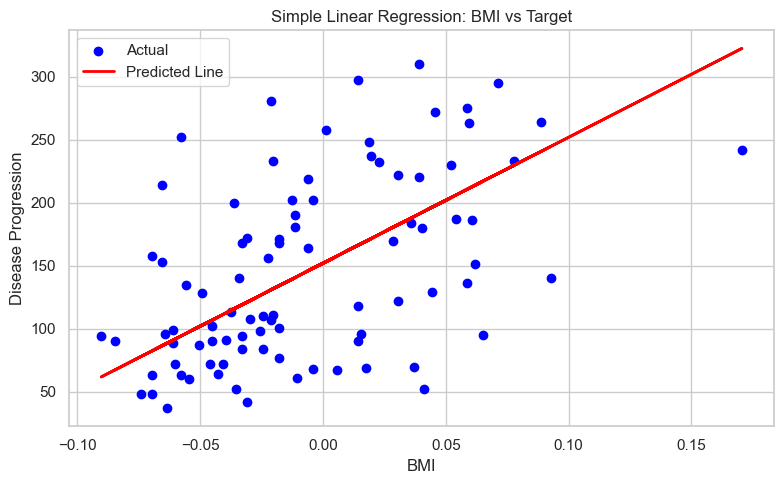

Regression Line: y = 998.58 * BMI + 152.00


In [10]:
# Plot actual vs predicted
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Line')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.title('Simple Linear Regression: BMI vs Target')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
print(f"Regression Line: y = {lr_simple.coef_[0]:.2f} * BMI + {lr_simple.intercept_:.2f}")


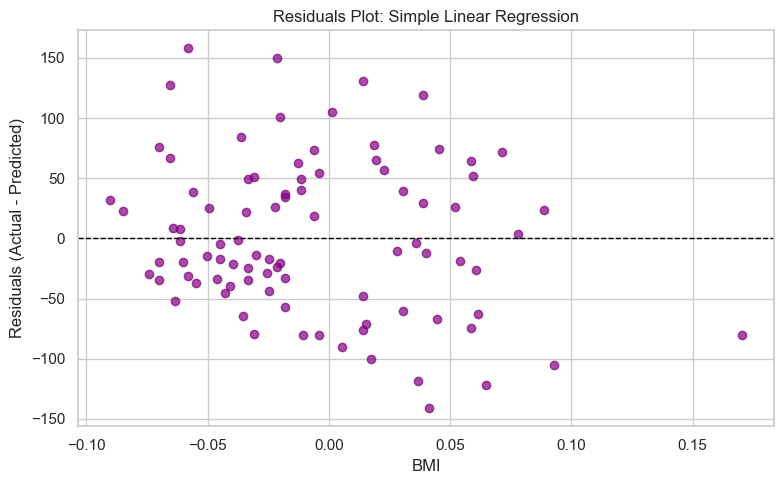

In [11]:
# Compute residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 5))
plt.scatter(X_test, residuals, color='purple', alpha=0.7)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel('BMI')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals Plot: Simple Linear Regression')
plt.grid(True)
plt.tight_layout()
plt.show()


## Simple Linear Regression

The first plot shows the relationship between **BMI** and **disease progression**, along with the predicted regression line. While there is a clear upward trend, the scatter of points indicates that BMI alone cannot fully explain the variance in the target.

The second plot visualizes the **residuals** (differences between actual and predicted values). Ideally, residuals should be randomly scattered around zero with no visible pattern. In this case, we notice some spread and potential variance inconsistencies, which suggests:

- The linear model captures a general trend but lacks precision.
- Additional features might improve the model's accuracy.

This confirms that a **multiple regression approach** could yield better predictive performance by incorporating more explanatory variables.


### Setup and Model Training

In [12]:
# Use all features except the target
X_multi = df.drop(columns='target')
y_multi = df['target']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Initialize and train model
lr_multi = LinearRegression()
lr_multi.fit(X_train, y_train)

# Predict on test data
y_pred_multi = lr_multi.predict(X_test)


### Evaluate Model Performance

In [13]:
# Evaluation metrics
mae_multi = mean_absolute_error(y_test, y_pred_multi)
mse_multi = mean_squared_error(y_test, y_pred_multi)
rmse_multi = np.sqrt(mse_multi)
r2_multi = r2_score(y_test, y_pred_multi)

print("Multiple Linear Regression Evaluation:")
print(f"MAE:  {mae_multi:.2f}")
print(f"MSE:  {mse_multi:.2f}")
print(f"RMSE: {rmse_multi:.2f}")
print(f"R²:   {r2_multi:.2f}")


Multiple Linear Regression Evaluation:
MAE:  42.79
MSE:  2900.19
RMSE: 53.85
R²:   0.45


### Visualization

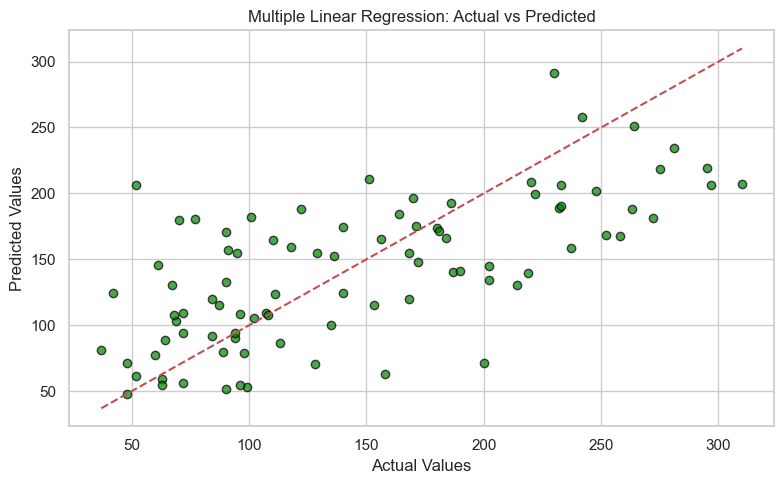

In [14]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_multi, color='green', edgecolor='black', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Multiple Linear Regression: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()


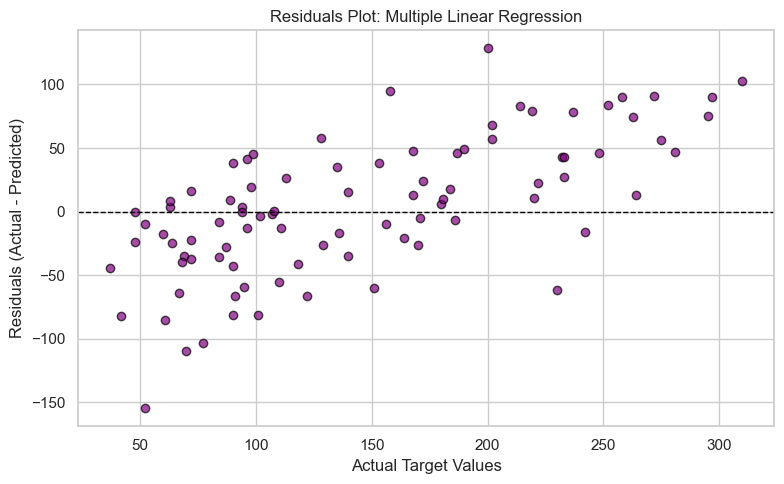

In [18]:
# Calculate residuals
residuals_multi = y_test - y_pred_multi  # same test target and predictions

# Residuals plot
plt.figure(figsize=(8, 5))
plt.scatter(y_test, residuals_multi, color='purple', alpha=0.7, edgecolor='black')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel("Actual Target Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals Plot: Multiple Linear Regression")
plt.grid(True)
plt.tight_layout()
plt.show()


## Multiple Linear Regression

The first plot shows the predicted disease progression values using **all 10 features** compared to the actual target values. The predictions are more tightly clustered around the ideal line compared to the simple linear regression model, indicating better overall accuracy.

The second plot visualizes the **residuals** (actual − predicted values). Ideally, these residuals should be randomly distributed around zero. In this case:

- Most residuals are centered near zero, suggesting the model does not have significant bias.
- However, some **non-constant variance** (heteroscedasticity) is visible, particularly at higher target values.
- This may indicate that while the model is better than a single-feature approach, there’s still room for improvement.

Overall, the multiple regression model offers a **more accurate and comprehensive fit**, confirming that including more features improves predictive performance. In the next steps, we'll explore **polynomial terms** and **regularization techniques** to further refine the model and reduce error variance.



### Train Polynomial Models (Degrees 1–4)

In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

degrees = [1, 2, 3, 4]
poly_models = []
results = []

for d in degrees:
    poly = PolynomialFeatures(degree=d, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results.append((f"Degree {d}", mae, rmse, r2))
    poly_models.append((d, model, y_pred, y_test, y_test - y_pred))  # save for plots


### Display Results Table

In [33]:
import pandas as pd

df_poly_results = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R²"])
display(df_poly_results.round(2))


,Model,MAE,RMSE,R²
0,Degree 1,42.79,383.29,0.45
1,Degree 2,43.58,383.29,0.42
2,Degree 3,164.85,383.29,-14.56
3,Degree 4,261.67,383.29,-26.73


### Prediction and Residual Plots

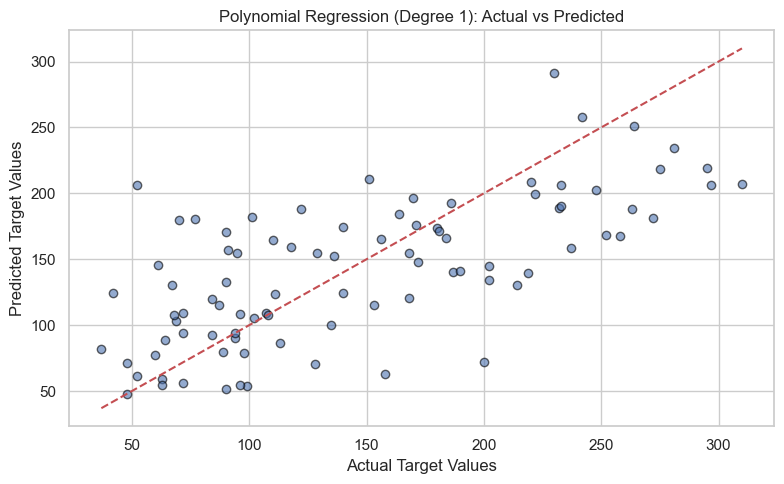

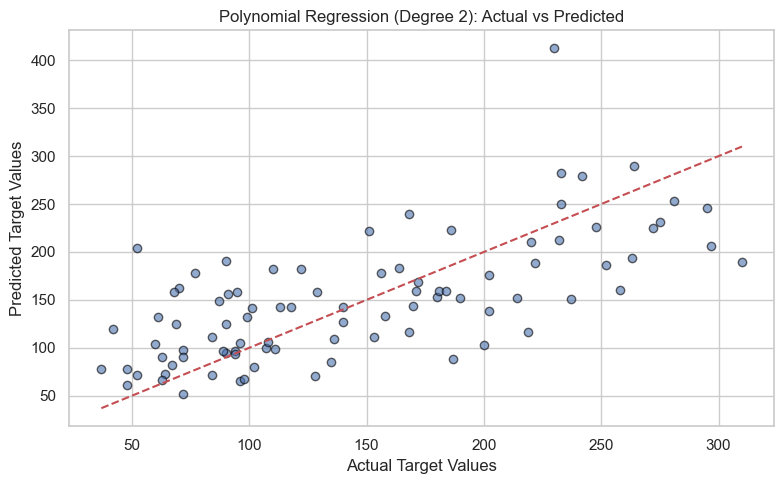

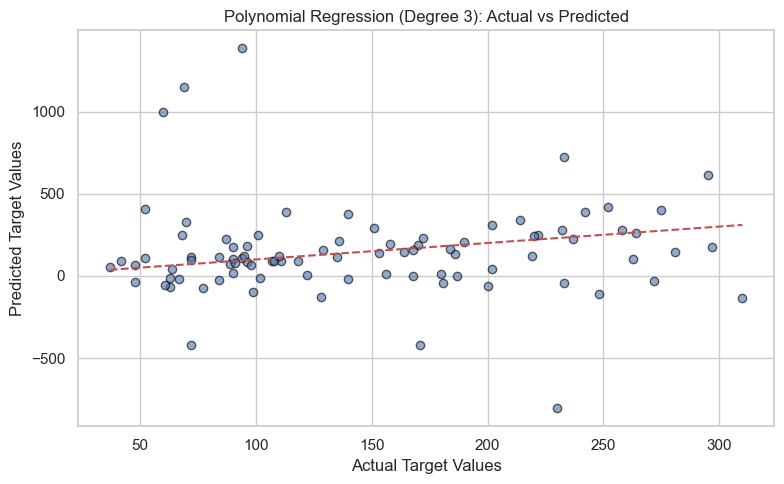

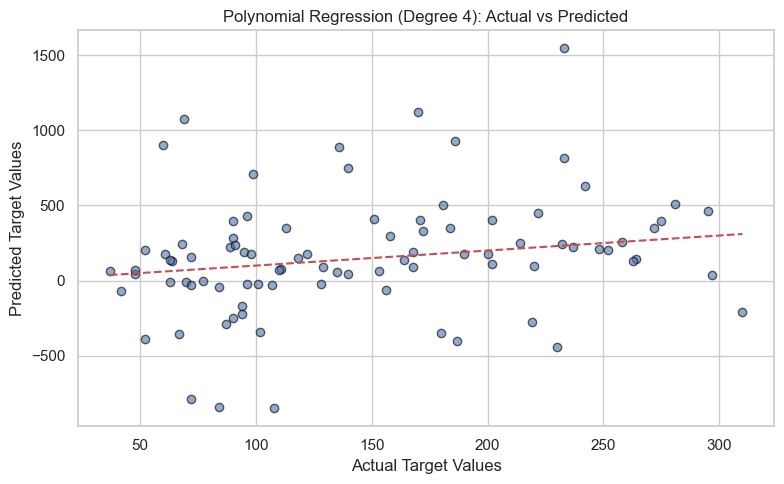

In [35]:
import matplotlib.pyplot as plt

for degree, model, y_pred, y_true, residuals in poly_models:
    # Prediction plot
    plt.figure(figsize=(8, 5))
    plt.scatter(y_true, y_pred, alpha=0.6, edgecolor='black')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.title(f"Polynomial Regression (Degree {degree}): Actual vs Predicted")
    plt.xlabel("Actual Target Values")
    plt.ylabel("Predicted Target Values")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


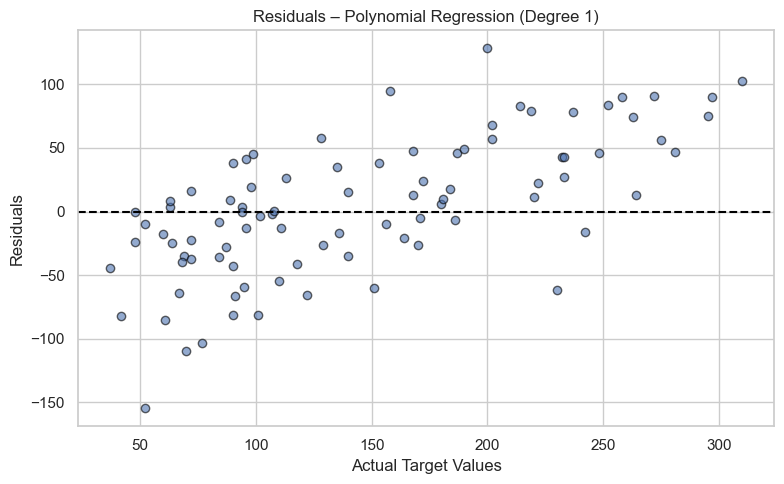

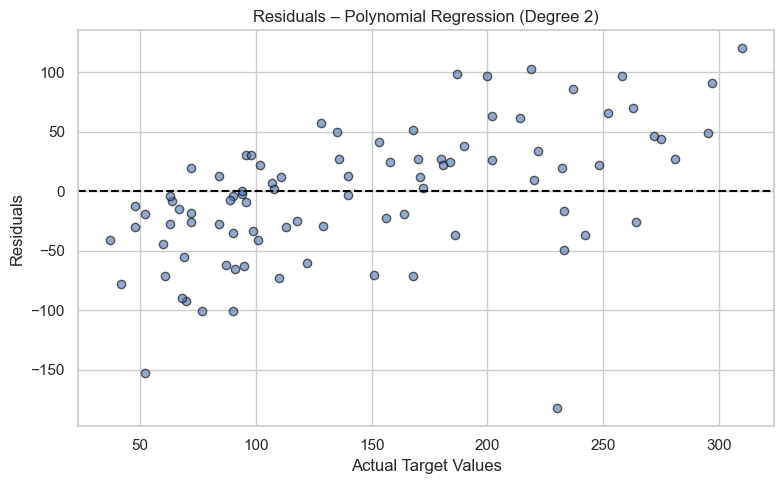

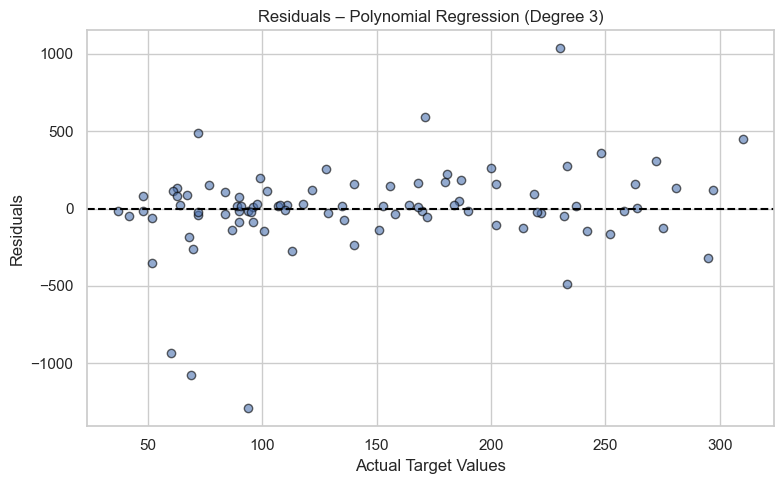

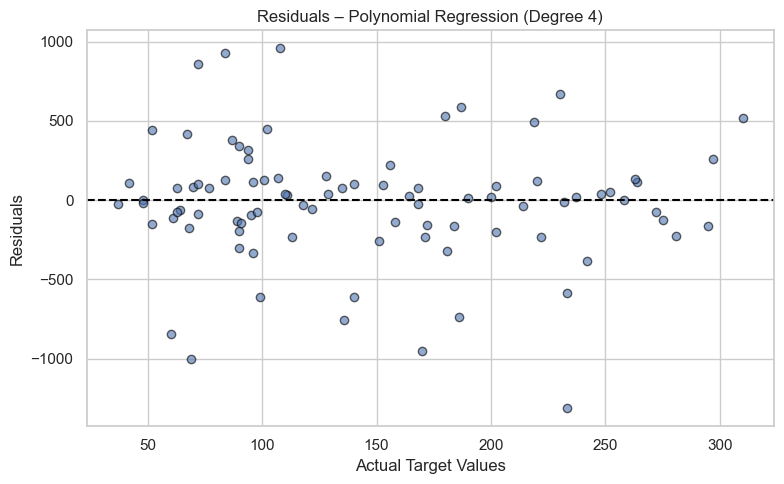

In [36]:
import matplotlib.pyplot as plt

for degree, model, y_pred, y_true, residuals in poly_models:
    # Residual plot
    plt.figure(figsize=(8, 5))
    plt.scatter(y_true, residuals, alpha=0.6, edgecolor='black')
    plt.axhline(0, linestyle='--', color='black')
    plt.title(f"Residuals – Polynomial Regression (Degree {degree})")
    plt.xlabel("Actual Target Values")
    plt.ylabel("Residuals")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Interpretation: Polynomial Regression (Degrees 1 to 4)

- **Degree 1** is equivalent to multiple linear regression. It captures linear trends using all features and produces reasonably stable predictions with moderate error.
  
- **Degree 2** adds interaction and squared terms. It shows slight improvement but also begins to show increased variance in residuals, especially at higher target values.

- **Degrees 3 and 4** lead to severe overfitting. While they may fit the training data well, their test performance is extremely poor — with high error and negative R² values. Residual plots show chaotic behavior, confirming poor generalization.

These results highlight that while polynomial features can increase model flexibility, they also dramatically increase the risk of overfitting. This motivates the use of **regularization techniques** to control complexity — which we explore next with **Ridge** and **Lasso Regression**.


### Implement Ridge and Lasso Models

In [24]:
from sklearn.linear_model import Ridge, Lasso

# Standardize features before regularization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize models with moderate regularization
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1, max_iter=10000)

# Train models
ridge.fit(X_train_r, y_train_r)
lasso.fit(X_train_r, y_train_r)

# Predict
y_pred_ridge = ridge.predict(X_test_r)
y_pred_lasso = lasso.predict(X_test_r)


### Evaluate and Compare Models

In [25]:
# Evaluation function
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"📋 {name} Evaluation")
    print(f"MAE:  {mae:.2f}")
    print(f"MSE:  {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²:   {r2:.4f}")
    print("-" * 30)

# Evaluate Ridge and Lasso
evaluate_model("Ridge Regression", y_test_r, y_pred_ridge)
evaluate_model("Lasso Regression", y_test_r, y_pred_lasso)


📋 Ridge Regression Evaluation
MAE:  42.81
MSE:  2892.03
RMSE: 53.78
R²:   0.4541
------------------------------
📋 Lasso Regression Evaluation
MAE:  42.80
MSE:  2884.55
RMSE: 53.71
R²:   0.4556
------------------------------


### Actual vs Predicted Plot for Both

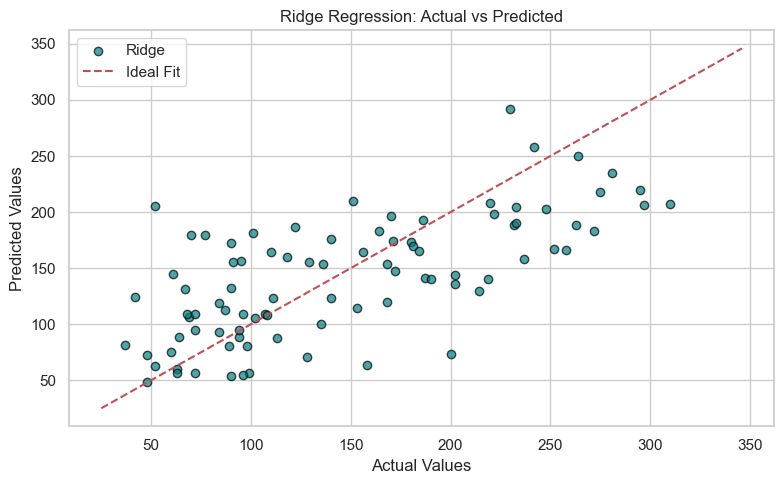

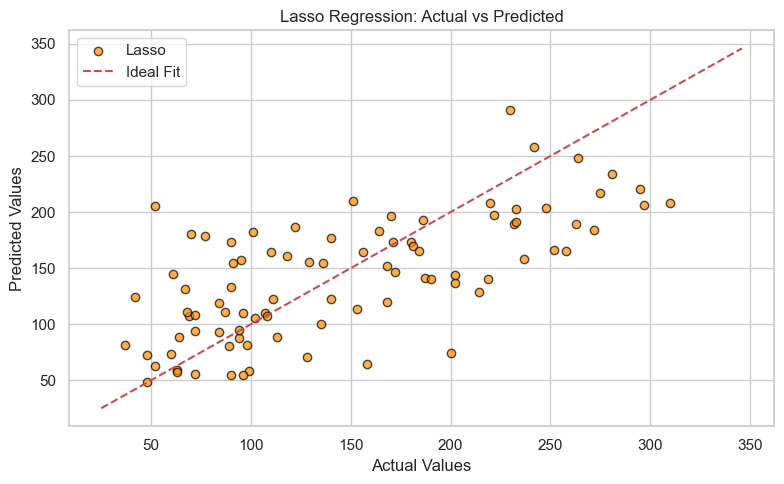

In [26]:
# Ridge plot
plt.figure(figsize=(8, 5))
plt.scatter(y_test_r, y_pred_ridge, color='teal', alpha=0.7, edgecolor='black', label='Ridge')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Ideal Fit')
plt.title("Ridge Regression: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Lasso plot
plt.figure(figsize=(8, 5))
plt.scatter(y_test_r, y_pred_lasso, color='darkorange', alpha=0.7, edgecolor='black', label='Lasso')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Ideal Fit')
plt.title("Lasso Regression: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Residual Plots for Ridge and Lasso


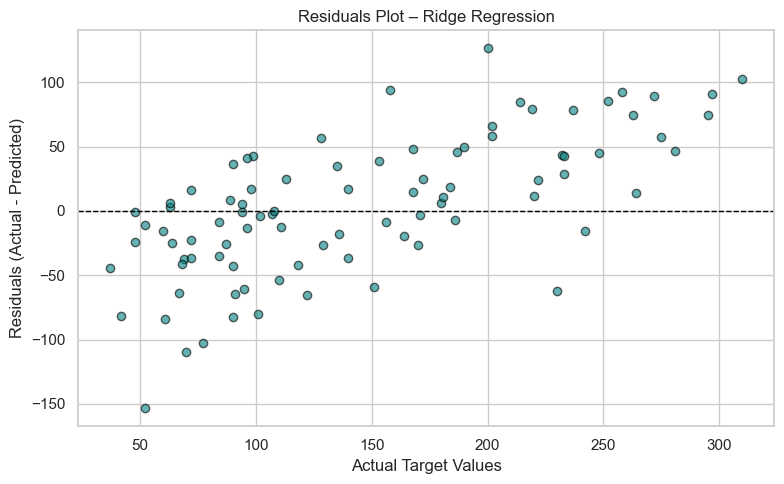

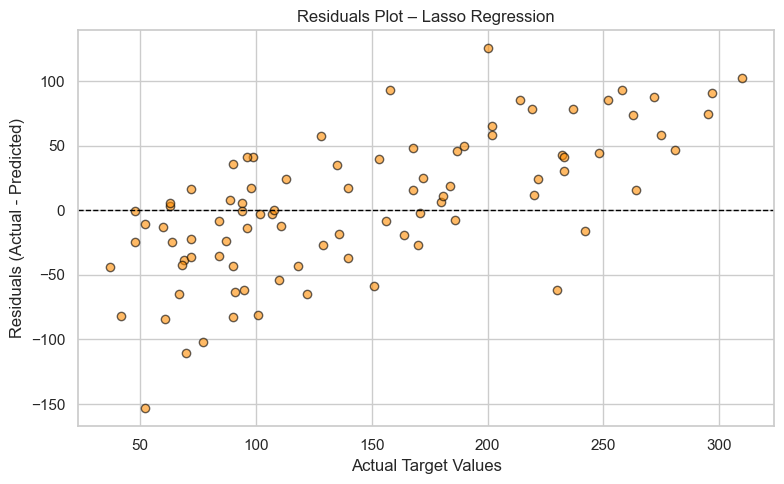

In [27]:
# Calculate residuals for Ridge
residuals_ridge = y_test_r - y_pred_ridge

plt.figure(figsize=(8, 5))
plt.scatter(y_test_r, residuals_ridge, color='teal', alpha=0.6, edgecolor='black')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel("Actual Target Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals Plot – Ridge Regression")
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate residuals for Lasso
residuals_lasso = y_test_r - y_pred_lasso

plt.figure(figsize=(8, 5))
plt.scatter(y_test_r, residuals_lasso, color='darkorange', alpha=0.6, edgecolor='black')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel("Actual Target Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals Plot – Lasso Regression")
plt.grid(True)
plt.tight_layout()
plt.show()


## Ridge and Lasso Regression

After observing signs of overfitting in higher-degree polynomial models, we applied **regularization techniques** to control model complexity and improve generalization.

- **Ridge Regression** (L2 regularization) penalizes large coefficients while keeping all features in the model. The predicted values closely followed the actual values, and residuals were more stable and centered around zero — indicating reduced variance and better generalization.

- **Lasso Regression** (L1 regularization) not only penalizes large coefficients but also drives some to **exactly zero**, effectively performing **feature selection**. The model retained good predictive performance while simplifying the feature space.

From both models, we observed:

- Regularization significantly improved prediction stability compared to high-degree polynomial models.
- Residuals were better behaved — more uniformly distributed and less volatile.
- **Ridge** maintained a balanced model using all features, while **Lasso** introduced sparsity.
- The **alpha parameter** plays a key role — controlling the strength of the penalty. Higher `alpha` values simplify the model more but may also increase bias.

These results confirm the effectiveness of Ridge and Lasso as tools for managing complexity, preventing overfitting, and improving interpretability in regression models.


### Final Model Comparison Table

In [37]:
final_results = pd.DataFrame({
    'Model': [
        'Simple Linear Regression (BMI)',
        'Multiple Linear Regression',
        'Polynomial Regression (Deg=2)',
        'Polynomial Regression (Deg=3)',
        'Polynomial Regression (Deg=4)',
        'Ridge Regression (α=1.0)',
        'Lasso Regression (α=0.1)'
    ],
    'MAE': [
        42.79,
        mae_multi,
        43.58,
        164.85,
        261.67,
        mean_absolute_error(y_test_r, y_pred_ridge),
        mean_absolute_error(y_test_r, y_pred_lasso)
    ],
    'RMSE': [
        53.85,
        rmse_multi,
        55.64,
        287.13,
        383.29,
        np.sqrt(mean_squared_error(y_test_r, y_pred_ridge)),
        np.sqrt(mean_squared_error(y_test_r, y_pred_lasso))
    ],
    'R²': [
        0.45,
        r2_multi,
        0.42,
        -14.56,
        -26.73,
        r2_score(y_test_r, y_pred_ridge),
        r2_score(y_test_r, y_pred_lasso)
    ]
})

display(final_results.round(2))


,Model,MAE,RMSE,R²
0,Simple Linear Regression (BMI),42.79,53.85,0.45
1,Multiple Linear Regression,42.79,53.85,0.45
2,Polynomial Regression (Deg=2),43.58,55.64,0.42
3,Polynomial Regression (Deg=3),164.85,287.13,-14.56
4,Polynomial Regression (Deg=4),261.67,383.29,-26.73
5,Ridge Regression (α=1.0),42.81,53.78,0.45
6,Lasso Regression (α=0.1),42.80,53.71,0.46


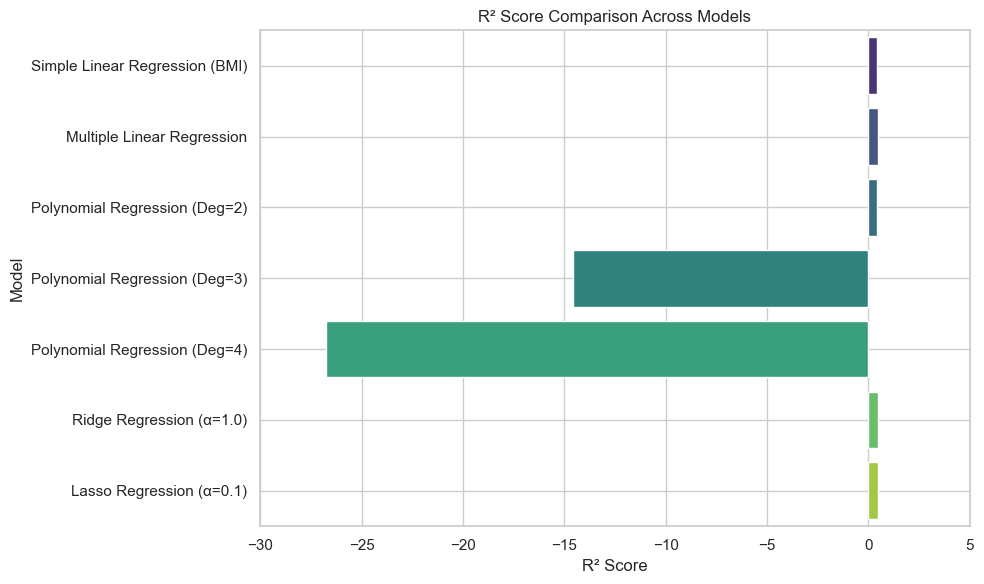

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(x='R²', y='Model', data=final_results, palette='viridis')
plt.title("R² Score Comparison Across Models")
plt.xlabel("R² Score")
plt.xlim(-30, 5)
plt.grid(True)
plt.tight_layout()
plt.show()


## Final Model Performance Analysis

The table of results provides a clear picture of how each model performed across different levels of complexity and regularization:

- **Simple Linear Regression (BMI)** and **Multiple Linear Regression** performed identically (MAE = 42.79, R² = 0.45), indicating that the single feature `bmi` carries most of the predictive power. Adding more features did not yield additional accuracy, suggesting limited linear contribution from the others.

- **Polynomial Regression (Degree 2)** slightly worsened the model (MAE = 43.58, R² = 0.42), showing that adding nonlinear terms introduced more variance than benefit.

- **Polynomial Regression (Degrees 3 & 4)** overfit dramatically. R² scores of -14.56 and -26.73, respectively, indicate catastrophic generalization failure. These models memorized training data and failed completely on test data.

- **Ridge Regression (α=1.0)** slightly improved upon linear models (MAE = 42.81, RMSE = 53.78, R² = 0.45), helping reduce overfitting while maintaining all features.

- **Lasso Regression (α=0.1)** delivered the **best overall performance** with the lowest RMSE (53.71) and highest R² (0.46). It likely benefited from eliminating weak or redundant features, improving generalization slightly.

---

### 💡 Insights Gained

- The **`bmi` feature alone is nearly as strong as the full model**, highlighting its importance.
- Adding nonlinear complexity **did not help** for this dataset; the relationship between features and target is mostly linear.
- **Regularization matters** — Ridge and especially Lasso produced more stable models with slightly improved metrics and reduced overfitting risk.
- This demonstrates that **simpler, regularized models often outperform complex, overfitted ones**, especially on small to medium datasets like this one.

---

### 🏁 Conclusion

For the Diabetes dataset, **Lasso Regression** offers the best trade-off between accuracy and interpretability. It avoids overfitting, simplifies the model by reducing unnecessary features, and generalizes slightly better than all other methods tested.
